#Chapter 3: Text Analysis

-- *A Python Course for the Humanities by Folgert Karsdorp and Maarten van Gompel*

---

In this chapter we will introduce you to the task of text analysis in Python. You will learn how to read an entire corpus into Python, clean it and how to perform certain data analyses on those texts. We will also briefly introduce you to using Python's plotting library *matplotlib*, with which you can visualize your data.

Before we delve into the main subject of this chapter, text analysis, we will first write a couple of utility functions that build upon the things you learnt in the previous chapter. Often we don't work with a single text file stored at our computer, but with multiple text files or entire corpora. We would like to have a way to load a corpus into Python.

Remember how to read files? Each time we had to open a file, read the contents and then close the file. Since this is a series of steps we will often need to do, we can write a single function that does all that for us. We write a small utility function `read_file(filename)` that reads the specified file and simply returns all contents as a single string.

In [ ]:
from os import listdir

# Google colab version
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/data/'

Mounted at /content/drive


In [ ]:
from nltk import word_tokenize

In [ ]:
def read_file(filename):
    "Read the contents of FILENAME and return as a string."
    infile = open(filename) # windows users should use codecs.open after importing codecs
    contents = infile.read()
    infile.close()
    return contents

In [ ]:
# google colab version
def read_file(path):
  with open(path, "r") as f:
    text = f.read()
    f.close()
    return text

Now, instead of having to open a file, read the contents and close the file, we can just call the function `read_file` to do all that:

In [ ]:
text = read_file(path + "/austen-emma-excerpt.txt")
print(text)

Emma by Jane Austen 1816

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.


In the directory `data/gutenberg/training` we have a corpus consisting of multiple files with the extension `.txt`. This corpus is a collection of English novels which we downloaded for you from the [Gutenberg](http://www.gutenberg.org) project. We want to iterate over all these files. You can do this using the `listdir` function from the `os` module. We import this function as follows:

In [ ]:
from os import listdir

After that, the `listdir` function is available to use. This function takes as argument the path to a directory and returns all the files and subdirectories present in that directory:

In [ ]:
listdir(path)
filenames = listdir(path)

full_paths = []
for fn in filenames:
  new_fn = path + "/" + fn
  #full_paths.append(new_fn)
  full_paths += [new_fn]


filenames

['austen-emma-excerpt-tokenised.txt',
 'austen-emma.txt',
 'twitter.txt',
 'austen-emma-excerpt.txt',
 'haggard',
 'arabian_nights',
 'british-novels',
 'names',
 'gutenberg']

In [ ]:
import re

regex = r".+\.txt$"

just_filenames = []
for fn in filenames: 
  if re.match(regex, fn):
    just_filenames.append(fn)

just_filenames

['austen-emma-excerpt-tokenised.txt',
 'austen-emma.txt',
 'twitter.txt',
 'austen-emma-excerpt.txt']

Notice that `listdir` returns a list and we can iterate over that list. Now, consider the following function:

In [ ]:
def list_textfiles(directory):
    "Return a list of filenames ending in '.txt' in DIRECTORY."
    textfiles = []
    for filename in listdir(directory):
        if filename.endswith(".txt"):
            textfiles.append(directory + "/" + filename)
    return textfiles

The function `listdir` takes as argument the name of a directory and lists all filenames in that directory. We iterate over this list and append each filename that ends with the extension, `.txt` to a new list of `textfiles`. Using the `list_textfiles` function, the following code will read all text files in the directory `data/gutenberg/training` and outputs the length (in characters) of each:

In [ ]:
for filepath in list_textfiles(path + "/gutenberg/training"):
    text = read_file(filepath)
    print(filepath +  " has " + str(len(text)) + " characters.")

/content/drive/My Drive/data/gutenberg/training/melville-piazza.txt has 467970 characters.
/content/drive/My Drive/data/gutenberg/training/whitman-patriotic.txt has 174241 characters.
/content/drive/My Drive/data/gutenberg/training/austen-emma.txt has 887071 characters.
/content/drive/My Drive/data/gutenberg/training/blake-songs.txt has 32223 characters.
/content/drive/My Drive/data/gutenberg/training/austen-pride.txt has 684765 characters.
/content/drive/My Drive/data/gutenberg/training/milton-paradise.txt has 468220 characters.
/content/drive/My Drive/data/gutenberg/training/chesterton-ball.txt has 457450 characters.
/content/drive/My Drive/data/gutenberg/training/shakespeare-caesar.txt has 112310 characters.
/content/drive/My Drive/data/gutenberg/training/austen-sense.txt has 673022 characters.
/content/drive/My Drive/data/gutenberg/training/shakespeare-hamlet.txt has 162881 characters.
/content/drive/My Drive/data/gutenberg/training/burgess-busterbrown.txt has 82992 characters.
/co

---

##Sentence tokenization

In the previous chapter we wrote a function to tokenize or split a text string into a list of words. However, using this function we lose information about where sentences end and start in the text. We will develop a function `split_sentences` that performs some very simple sentence splitting when passed a text string. Each sentence will be represented as a new string, so the function as a whole returns a list of sentence strings. We assume that any occurrence of either `.` or `!` or `?` marks the end of a sentence. In reality, this is more ambiguous of course. Consider for example the use of periods as end-of-sentence marker as well as in abbreviations and initials!

How should we tackle this problem? Have a look at the following picture:

![caption](https://github.com/fbkarsdorp/python-course/blob/master/images/indexing.png?raw=true)

The first sentence *Hello there!* spans from index 0 to index 11. The second sentence from 13 to 26. If we come up with a way to extract those indexes, we could slice the text into separate sentences. First we define a utility function `end_of_sentence` that takes as argument a character and returns `True` if it is an end-of-sentence marker, otherwise it returns `False`. 

---

####Quiz!

Write the function `end_of_sentence_marker` below:

In [ ]:
def end_of_sentence_marker(character):
    # insert your code here
    return character in "!.?"



# these tests should return True if your code is correct
print(end_of_sentence_marker("?") == True)
print(end_of_sentence_marker("a") == False)

True
True


Now let's rewrite the function using regular expressions!

How about `re.match` or, as overkill, `re.fullmatch`?

In [ ]:
def end_of_sentence_marker(character):
    # insert your code here
    if re.match(r"[\!\.\?]", character):
      return True
    else:
      return False

# these tests should return True if your code is correct
print(end_of_sentence_marker("?") == True)
print(end_of_sentence_marker("a") == False)

True
True


---

An important function we will use is the built in `enumerate`. `enumerate` takes as argument any iterable (a string a list etc.). Let's see it in action:

In [ ]:
for element in enumerate("Python"):
    print(element)

(0, 'P')
(1, 'y')
(2, 't')
(3, 'h')
(4, 'o')
(5, 'n')


As you can see, enumerate allows you to iterate over an iterable and for each element in that iterable, it gives you its corresponding index. A slightly more convenient way of iterating over `enumerate` is the following:

In [ ]:
for _, character in enumerate("Python"):
    print(character)

P
y
t
h
o
n


This way, we have easy access to both the index and the original item in the iterable. Now we know enough to write our `split_sentences` function. We will walk you through it, step by step, but first try to read the function and think about what it possibly does at each step:

In [ ]:
def split_sentences(text):
    "Split a text string into a list of sentences."
    sentences = []
    start = 0
    for end, character in enumerate(text):
        if end_of_sentence_marker(character):
            sentence = text[start: end + 1]
            sentences.append(sentence)
            start = end + 2
    return sentences

The function `split_sentences` takes as argument a text represented by a simple string. Within the function we define a variable `sentences` in which we will store the individual sentences. We need to extract both the start position and the end position of each sentence. We know that the first sentence will always start at position 0. Therefore we define a variable start and set it to zero.

Next we will use `enumerate` to loop over all individual characters in the text. Remember that enumerate returns pairs of indexes and their corresponding elements (here characters). For each character we check whether it is an end-of-sentence marker. If it is, the variable `end` marks the position in `text` where a sentence ends. We can now slice the text from the starting position to the end position and obtain our sentence. Notice that we add 1 to the end position. Why would that be? This is because, as you might remember from the first chapter, slices are non-inclusive, so `text[start:end]` would return the text starting at `start` and ending one position before `end`. Since we have reached the end of a sentence, we know that the next sentence will start at least one position later than our last end point. Therefore, we update the start variable to `end + 1`. Let's check whether our function works as promised:

In [ ]:
print(split_sentences("This is a sentence. Should we seperate it from this one?"))

['This is a sentence.', 'Should we seperate it from this one?']


It does! 

Now let's simplify this considerably with `re.split`!

Takes two steps (if we want to retain final punctuation in each of our substrings).
1. Pad the full string with a space at the end (to make sure the final sentence ends with a sequence PUNCT + WHITESPACE
2. split at all whitespaces if they are preceded by a final punctuation marker

For step 2, we need a special regex known as **positive look-behind**

Positive look-behind has the following form:
```{python}
r"(?<=)"
```

Below is an example of positive look-behind for matching b's that are preceded by a's.

In [ ]:
test_string = "ab ba cb ab bb"

regex = r"(?<=a)b"

re.findall(regex, test_string)

['b', 'b']

You can also use **negative look-behind**

It has the following form

```{python}
r"(?<!)"
```

In [ ]:
regex = r"(?<!a)b"

re.findall(regex, test_string)

['b', 'b', 'b', 'b']

Now let's apply this regex to solving the sentence segmentation problem. 

In [ ]:
def split_sentences(raw_text):
  regex = r"(?<=[\?\.\!]) +"
  output = re.split(regex, raw_text)
  return output

print(split_sentences("This is a sentence. Should we seperate it from this one?"))

['This is a sentence.', 'Should we seperate it from this one?']


---

####Quiz!

To conclude this section, you will write a wrapper function `tokenize`, that takes as input a text represented by a string and tokenizes this string into sentences. After that, we clean each sentence, by lowercasing all words and removing punctuation. The final step is to tokenize each sentence into a list of words. The file `preprocessing.py` contains a function called `clean_text` which removes all punctuation from a text and turns all characters to lowercase. We import that function using the following line:

In [ ]:
#from pyhum.preprocessing import clean_text

# We'll do this using regex
# We need to:
# - remove punctuation
# - lowercase text
# punctuation can be found in string.punctuation
import string
print(string.punctuation)

test_string = "T@hi##S IS!!,> So,}}me uG>>ly TeXT."

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
def clean_text(input_text):
  output_string = ""
  for char in input_text:
    if char not in string.punctuation:
      output_string += char
  return output_string.lower()
      
print(test_string)
print(clean_text(test_string))

T@hi##S IS!!,> So,}}me uG>>ly TeXT.
this is some ugly text


In [ ]:
import nltk
 
 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# another way
from os import sys
location = "/content/drive/My Drive/"
sys.path.append(location)
from PyHum.preprocessing import clean_text

print(test_string)
print(word_tokenize(clean_text(test_string)))

ModuleNotFoundError: ignored

In [ ]:
def word_tokenizer(cleaned_sentence):
    word_list = re.split(r" ", cleaned_sentence)
    return word_list

def tokenize(text):
    """Transform TEXT into a list of sentences. Lowercase 
    each sentence and remove all punctuation. Finally split each
    sentence into a list of words."""
    # insert your code here
    clean_sentences = []
    sentences = split_sentences(text)
    for sent in sentences:
        clean_sent = clean_text(sent)
        word_list = word_tokenizer(clean_sent)
        clean_sentences += [word_list]
    return clean_sentences
# these tests should return True if your code is correct
print(tokenize("This is a sentence. So, what!") == 
      [["this", "is", "a", "sentence"], ["so", "what"]])

#tokenize(clean_text("This is a sentence. So what?"))

True


---

##General Text Statistics

> When the next night came, Dinarazad said to her sister Shahrazad: ‘In God’s name, sister, if you are not asleep, then tell us one of your stories!’ Shahrazad answered: ‘With great pleasure! I have heard tell, honoured King, that…’

*Alf Laylah Wa Laylah*, *the Stories of One Thousand and One Nights* is a collection of folk tales, collected over many centuries by various authors, translators, and scholars across West, Central and South Asia and North Africa, forms a huge narrative wheel with an overarching plot, created by the frame story of Shahrazad.

The stories begin with the tale of king Shahryar and his brother, who, having both been deceived by their respective Sultanas, leave their kingdom, only to return when they have found someone who — in their view — was wronged even more. On their journey the two brothers encounter a huge jinn who carries a glass box containing a beautiful young woman. The two brothers hide as quickly as they can in a tree. The jinn lays his head on the girl’s lap and as soon as he is asleep, the girl demands the two kings to make love to her or else she will wake her ‘husband’. They reluctantly give in and the brothers soon discover that the girl has already betrayed the jinn ninety-eight times before. This exemplar of lust and treachery strengthens the Sultan’s opinion that all women are wicked and not to be trusted. 

When king Shahryar returns home, his wrath against women has grown to an unprecedented level. To temper his anger, each night the king sleeps with a virgin only to execute her the next morning. In order to make an end to this cruelty and save womanhood from a "virgin scarcity", Sharazad offers herself as the next king’s bride. On the first night, Sharazad begins to tell the king a story, but she does not end it. The king’s curiosity to know how the story ends, prevents him from executing Shahrazad. The next night Shahrazad finishes her story, and begins a new one. The king, eager to know the ending of this tale as well, postpones her execution once more. Using this strategy for One Thousand and One Nights in a labyrinth of stories-within-stories-within-stories, Shahrazad attempts to gradually move the king’s cynical stance against women towards a politics of love and justice (see Marina Warner’s *Stranger Magic* (2013) in case you're interested).

The first European version of the Nights was translated into French by Antoine Galland. Many translations (in different languages) followed, such as the (heavily criticized) English translation by Sir Richard Francis Burton entitled *The Book of the Thousand and a Night* (1885). This version is freely available from the Gutenberg project (see [here](http://www.gutenberg.org)), and will be the one we will explore here.

---

####Quiz!

In the directory `data/arabian_nights` you will find 999 files. This is because in Burton's translation some nights are missing. The name of the file represents the corresponding night of storytelling in *Alf Laylah Wa Laylah*. Go have a look. Use the tokenize function and the corpus reading function we have defined above and tokenize and clean each night. Store the result in the variable named `corpus`.

In [ ]:
filenames = list_textfiles(path + "/arabian_nights")

In [ ]:
print(filenames[:5])

['/content/drive/My Drive/Colab Notebooks/data//arabian_nights/1001.txt', '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/10.txt', '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/107.txt', '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/106.txt', '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/105.txt']


---

In [ ]:
corpus = []
for fn in filenames:
  text_string = read_file(fn)
  tok = tokenize(text_string)
  corpus.append(tok)

In [ ]:
corpus[0][0][0]

'\ndunyazad'

Great job! You now should have a corpus containing 999 texts. It is always important to check whether our code actually produces the desired results. Let's check whether we indeed have 999 texts:

In [ ]:
print(len(corpus))

999


OK, that seems to be correct. It would be convenient for further processing to have the corpus in chronological order. Let's have a look the first 20 files returned by `list_textfiles`:

In [ ]:
list_textfiles(path + "/arabian_nights")[:20]

['/content/drive/My Drive/Colab Notebooks/data//arabian_nights/1001.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/10.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/107.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/106.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/105.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/113.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/101.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/114.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/100.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/109.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/112.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/103.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/1000.txt',
 '/content/drive/My Drive/Colab Notebooks/data//ar

In [ ]:
from os.path import splitext

In [ ]:
splitext("file.txt")

('file', '.txt')

As you can see the files are sorted by their string name and not by their numbering. To be able to sort the files by their numbers we must first remove the extension `.txt` as well as the directory `data/arabian_nights/`.

---

####Quiz!

**1)** Write a function `remove_txt` that takes as argument a string and some extension that you want to remove. It should return the string without the extension. Tip: use the function `splitext` from the `os.path` module. Look up the documentation [here](http://docs.python.org/3.4/library/os.path.html#os.path.splitext).

In [ ]:
from os.path import splitext

def remove_ext(filename):
    # insert your code here
    base = splitext(filename)[0]
    return base  


# these tests should return True if your code is correct
print(remove_ext("data/arabian_nights/1.txt") == "data/arabian_nights/1")
print(remove_ext("ridiculous_selfie.jpg") == "ridiculous_selfie")

True
True


Now let's rewrite this function using regex!

Rather than using `splitext`, we can use `re.sub`. 

In [ ]:
# Regex approach to remove file extensions
string = "Don't take me!"

re.sub(r"^([^m]+) me\!", r"\1", string)

"Don't take"

In [ ]:
fn = '/content/drive/My Drive/data/arabian_nights/413.txt'
new_fn = re.sub(r".+\/([^\/]+)\.txt$", r"\1", fn)
new_fn

'413'

**2)** Write a function `remove_dir` that takes as argument a filepath and removes the directory from a filepath. Tip: use the function `basename` from the `os.path` module. Look up the document [here](http://docs.python.org/3.4/library/os.path.html#os.path.basename)

In [ ]:
from os.path import basename

basename(fn)

'413.txt'

In [ ]:
from os.path import basename

def remove_dir(filepath):
    # insert your code here
    trimmed_file = basename(filepath)
    return trimmed_file

# these tests should return True if your code is correct
print(remove_dir("data/arabian_nights/1.txt") == "1.txt")
print(remove_dir("/a/kind/of/funny/filepath/to/file.txt") == "file.txt")

True
True


Now let's try the same problem, but using regular expressions and `re.sub`!

In [ ]:
# Regex approach to remove the directory information
def remove_dir(filepath):
    # insert your code here
    trimmed_file = re.sub(r".+\/([^\/]+)", r"\1", filepath)
    return trimmed_file

# these tests should return True if your code is correct
print(remove_dir("data/arabian_nights/1.txt") == "1.txt")
print(remove_dir("/a/kind/of/funny/filepath/to/file.txt") == "file.txt")

True
True


**3)** Combine the two functions `remove_ext` and `remove_dir` into one function `get_filename`. This function takes as argument a filepath and returns the name (without the extensions) of the file.

In [ ]:
def get_filename(filepath):
    # insert your code here
    base_name = remove_dir(filepath)
    clean_name = remove_ext(base_name)
    return(clean_name)
    
# these tests should return True if your code is correct
print(get_filename("data/arabian_nights/1.txt") == '1')

True


And let's do it all in one simple function using regex!

In [ ]:
# Single regex to clean filenames
def get_filename(filepath):
  regex = r".+\/([^\.\/]+)\..+$"
  return re.sub(regex, r"\1", filepath)

get_filename(fn)
# these tests should return True if your code is correct
print(get_filename("data/arabian_nights/1.txt") == '1')

True


---

The final step is to convert numbers represented as string (e.g. "1" and "10") to a number. This can be achieved by using the function `int`:

In [ ]:
x_as_string = "1"
x_as_int = int(x_as_string)
print(x_as_int)

1


The process of converting a string into an integer, is called *type casting*. Strings are different types than integers. To see this, have a look at the following:

In [ ]:
x = "1"
y = "2"
print(x + y)

12


12? Yes, 12. This is because, as you might remember from the first chapter, we can use the `+` operator to concatenate two strings. If we apply the same operation to integers, as in:

In [ ]:
x = 1
y = 2
print(x + y)

3


we get the expected result of 3.

---

####Quiz!

Combine the functions `int` and `get_filename` into the function `get_night` to obtain the integer corresponding to a night.

In [ ]:
def get_night(filepath):
    # insert your code here
    fn = get_filename(filepath)
    int_fn = int(fn)
    return(int_fn)

# these tests should return True if your code is correct
print(get_night("data/arabian_nights/1.txt") == 1)

True


We can likewise solve this problem with a simple regex!

In [ ]:
# Single regex to clean filenames
def get_night(filepath):
  regex = r".+\/([^\.\/]+)\..+$"
  fn = re.sub(regex, r"\1", filepath)
  int_fn = int(fn)
  return(int_fn)

# these tests should return True if your code is correct
print(get_night("data/arabian_nights/1.txt") == 1)

True


---

OK, so now we can convert the filepaths to integers corresponding to the nights of storytelling. But how will we use that to sort the corpus in chronological order? In chapter 1 we briefly discussed how to sort your collection of good reads. In combination with our `get_night` function, we can use `sort` to obtain a nicely chronologically ordered list of stories. Prepare yourself for some real Python magic, because the following lines of code might be a little dazzling...

First we list all files using `list_textfiles` and store it in the variable `filenames`:

In [ ]:
filenames = list_textfiles(path + '/arabian_nights')

Next we call the function `.sort()` on this list and supply as keyword our function `get_night`:

In [ ]:
filenames.sort(key=get_night)
filenames[:20]

['/content/drive/My Drive/Colab Notebooks/data//arabian_nights/1.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/2.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/3.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/4.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/5.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/6.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/7.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/8.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/9.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/10.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/11.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/12.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/13.txt',
 '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/14.txt',
 

As you can see, we now have a perfectly chronologically ordered list of filenames. But how, **HOW!** did that work? As you might have guessed, the argument of `sort`: `key=get_night`, has something to do with all this magic. Without this argument, Python would just sort the filenames alphabeticaly:

In [ ]:
filenames = list_textfiles(path + '/arabian_nights')
filenames.sort()
print(filenames[:20])

['/content/drive/My Drive/Colab Notebooks/data//arabian_nights/1.txt', '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/10.txt', '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/100.txt', '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/1000.txt', '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/1001.txt', '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/101.txt', '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/102.txt', '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/103.txt', '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/104.txt', '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/105.txt', '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/106.txt', '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/107.txt', '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/108.txt', '/content/drive/My Drive/Colab Notebooks/data//arabian_nights/10

However, if we supply a function to `key`, Python will internally first apply that function to all items we want to sort. In our case this means Python converts all filepaths to integers. After that Python sorts the list. Then for each converted item it returns the corresponding item in the original list. (Technically this is not an accurate description, but it basically comes down to this.)

If you still feel a little dizzy after all this, don't be afraid. Sometimes it is good enough to use a particular piece of code even if you don't completely understand it. We can now use these functions to reload the corpus, this time in chronological order:

In [ ]:
corpus = []
filenames = list_textfiles(path + "/arabian_nights")
filenames.sort(key=get_night)
for filename in filenames:
    text_string_2 = read_file(filename)
    tok_2 = tokenize(text_string_2)
    corpus.append(tok_2)

AttributeError: ignored

In [ ]:
corpus[0][:2]

[['in',
  'the',
  'name',
  'of',
  'allah',
  '\nthe',
  'compassionating',
  'the',
  'compassionate\npraise',
  'be',
  'to',
  'allah',
  '',
  'the',
  'beneficent',
  'king',
  '',
  'the',
  'creator',
  'of',
  'the',
  'universe',
  '',
  'lord',
  'of',
  'the',
  'three',
  'worlds',
  '',
  'who',
  'set',
  'up',
  'the',
  'firmament',
  'without',
  'pillars',
  'in',
  'its',
  'stead',
  '',
  'and',
  'who',
  'stretched',
  'out',
  'the',
  'earth',
  'even',
  'as',
  'a',
  'bed',
  '',
  'and',
  'grace',
  'and',
  'prayerblesslng',
  'be',
  'upon',
  'our',
  'lord',
  'mohammed',
  '',
  'lord',
  'of',
  'apostolic',
  'men',
  '',
  'and',
  'upon',
  'his',
  'family',
  'and',
  'companion',
  'train',
  '',
  'prayer',
  'and',
  'blessings',
  'enduring',
  'and',
  'grace',
  'which',
  'unto',
  'the',
  'day',
  'of',
  'doom',
  'shall',
  'remain',
  '',
  'amen'],
 ['',
  'o',
  'thou',
  'of',
  'the',
  'three',
  'worlds',
  'sovereign\nand',


---

###Exploratory data analysis

As a first exploratory data analysis, we are going to compute for each night how many sentences it contains and how many words. It is quite easy to count the number of sentences per night, since each night is represented by a list of sentences.

In [ ]:
sentences_per_night = []
for night in corpus:
    sentences_per_night.append(len(night))
print(sentences_per_night[:10])

[]


Using the function `max` we can find out what the highest number of sentences is:

In [ ]:
max(sentences_per_night)

ValueError: ignored

Similarly, if we would like to now what the lowest number of sentences is, we use the function `min`:

In [ ]:
min(sentences_per_night)

1

---

####Quiz!

The function `sum` takes a list of numbers as input and returns the sum:

In [ ]:
print(sum([1, 3, 3, 4]))

11


Use this function to compute the average number of sentences per night. Note if you use Python 2.7, you will need to convert the result of sum, which will be an integer to a `float`, using `float(some_number)`. 

In [ ]:
# if you use Python 3.x, both print statements will return 
# the same thing and you don't need to worry.
number = 1
print(number)
number = float(number)
print(number)

1
1.0


In [ ]:
# insert your code here for the average number of sentences per night
# remember that the mean of set of numbers is the sum of those numbers over the size of the set (the number of numbers)

sum(sentences_per_night)/len(sentences_per_night)


21.094094094094093

---

Given our data structure of a list of sentences which are themselves lists of words, it is a little trickier to count for each night how many words it contains. One possible way is the following:

In [ ]:
words_per_night = []
for night in corpus:
    n_words = 0
    for sentence in night:
        n_words += len(sentence)
    words_per_night.append(n_words)

In [ ]:
words_per_night[:20]

[11371,
 4314,
 1999,
 1783,
 4492,
 1381,
 2674,
 1330,
 1174,
 1749,
 1030,
 1694,
 915,
 849,
 2686,
 1215,
 958,
 1070,
 1312,
 1249]

Make sure you really understand these lines of code as you will need them in the next quiz. 

The suspense created by Shahrazad’s story-telling skills is intriguing, especially the “cliff-hanger” ending each night which she uses to avert her own execution (and possibly that of womanhood). Every night she tells the Sultan a story only to stop at dawn and she picks up the thread the next night. But does it really take the whole night to tell a particular story?

I am not aware of any exact numbers about how many words people speak per minute. Averages seem to fluctuate between 100 and 200 words per minute. Narrators are advised to use approximately 150 words per minute in audiobooks. I suspect that this number is a little lower for live storytelling and assume it lies around 130 words per minute (including pauses). Using this information, we can compute the time it takes to tell a particular story as follows:

$$\textrm{story time}(\textrm{text}) = \frac{\textrm{number of words in text}}{\textrm{number of words per minute}}$$

---

####Quiz!

**1)** Write a function called `story_time` that takes as input a text. Given a speed of 130 words per minute, compute how long it takes to tell that text.

In [ ]:
def story_time(text):
  # insert your code here
  len_words = 0
  for sent in text:
    len_words += len(sent)
  len_minutes = len_words/130
  return(len_minutes)

# these tests should return True if your code is correct
print(story_time([["story", "story"]]) * 130 == 2.0)

True


**2)** Compute the story_time for each night in our corpus. Assign the result to the variable `story_time_per_night`.

In [ ]:
story_time_per_night = []
# insert your code here
for story in corpus:
  time = story_time(story)
  story_time_per_night.append(time)
  
print(story_time_per_night[:10])

[87.46923076923076, 33.184615384615384, 15.376923076923077, 13.715384615384615, 34.55384615384615, 10.623076923076923, 20.56923076923077, 10.23076923076923, 9.03076923076923, 13.453846153846154]


Note that we can accomplish the same goal more directly using the word counts that we already computed. 

In [ ]:
story_times = []
for word_count in words_per_night:
    time = word_count / 130
    story_times.append(time)


story_times[:10]

[87.46923076923076,
 33.184615384615384,
 15.376923076923077,
 13.715384615384615,
 34.55384615384615,
 10.623076923076923,
 20.56923076923077,
 10.23076923076923,
 9.03076923076923,
 13.453846153846154]

**3**) Compute the average, minimum and maximum story telling time.

In [ ]:
# insert your code here
def average(nums):
  numerator = sum(nums)
  denominator = len(nums)
  return numerator/denominator

average(story_times)

9.58785708785709

(Or we can use `numpy`)

In [ ]:
from numpy import mean

mean(story_times)

9.587857087857088

In [ ]:
max(story_times)

87.46923076923076

In [ ]:
min(story_times)

2.330769230769231

---

###Visualizing general statistics

Now that we have computed a range of general statistics for our corpus, it would be nice to visualize them. Python's plotting library *matplotlib* (see [here](http://matplotlib.org)) allows us to produce all kinds of graphs. We could for example, plot for each story, how many sentences it contains:

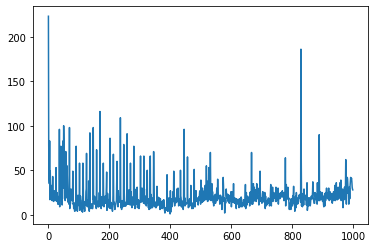

In [ ]:
import matplotlib.pyplot as plt

plt.plot(sentences_per_night)

---

####Quiz!

**1)** Can you do the same for `words_per_night`?

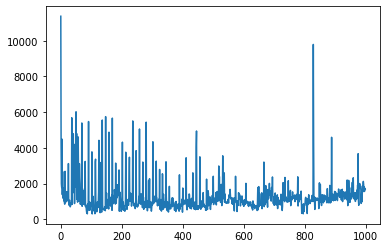

In [ ]:
# insert your code here
plt.plot(words_per_night)


**2)** And can you do the same for `story_time_per_night`?

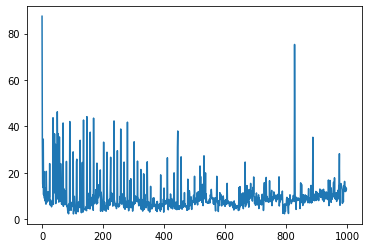

In [ ]:
# insert your code here
plt.plot(story_time_per_night)

**3)** In this final exercise we will put everything together what we have learnt so far. We want you to write a function `positions_of` that returns for a given word all sentence positions in the *Arabian Nights* where that word occurs. We are not interested in the positions relative to a particular night, but only to the corpus as a whole. Use that function to find all occurences of the name Sharahzad and store the corresponding indexes in the variable `positions_of_shahrazad`. Do the same thing for the name *Ali*. Store the result in `positions_of_ali`. Finally, find all occurences of *Egypt* and store the indexes in `positions_of_egypt`. Tip: (1) remember that we lowercased the entire corpus! (2) remember that indexes start at 0.

In [ ]:
def positions_of(word):
    # Keep track of the current position (start at 0)
    pos = 0
    # Open a list to store the positions for any matches
    positions = []
    # Go through the corpus file by file (with the sorted corpus)
    for doc in corpus:
      for sent in doc:
        #...now down to the word level...
        for token in sent:
          # We can check if the word matches our target
          if token == word:
            # If so, take down its position
            positions.append(pos)
          # Increase position to indicate that we will now go one word further in the corpus
          pos += 1
    return(positions)



positions_of_shahrazad = positions_of("shahrazad")
positions_of_ali = positions_of("ali")
positions_of_egypt = positions_of("egypt")

If everything went well, the following lines of code should produce a nice dispersion plot of all sentence occurences of Shahrazad, Ali and Egypt in the corpus.

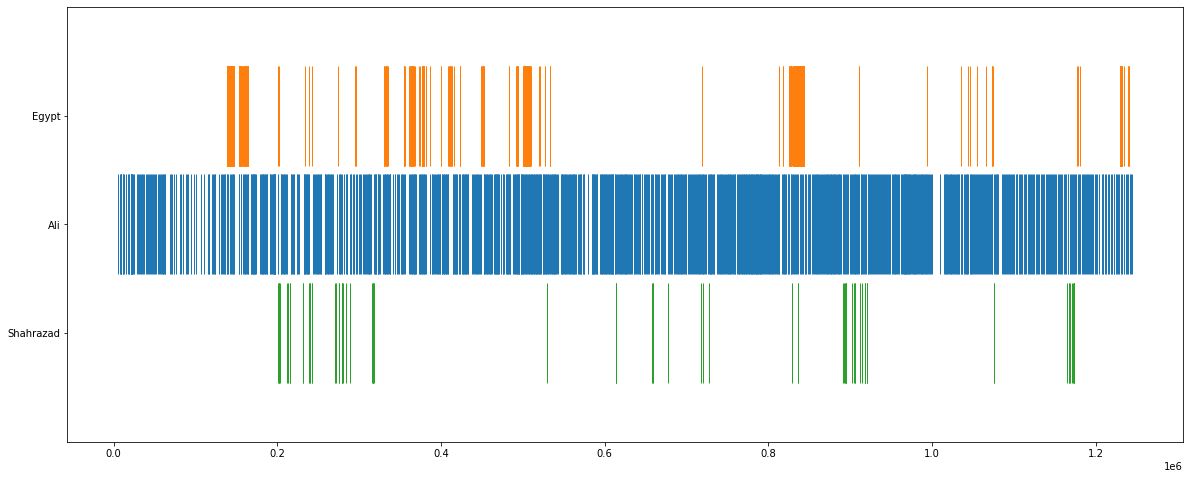

In [ ]:
plt.figure(figsize=(20, 8))
names = ["Shahrazad", "Ali", "Egypt"]
plt.plot(positions_of_shahrazad, [1]*len(positions_of_shahrazad), "|", markersize=100)
plt.plot(positions_of_ali, [2]*len(positions_of_ali), "|", markersize=100)
plt.plot(positions_of_egypt, [0]*len(positions_of_egypt), "|", markersize=100)
plt.yticks(range(len(names)), names)
_ = plt.ylim(-1, 3)

---

> Then Shahrazad reached the morning, and fell silent in the telling of her tale…

Let's try some other things! 

First, let's try to count the frequency of all words in the entire Arabian Nights.

For this, we will use the `nltk` library. It has a very useful function `FreqDist` which takes a list of words as input, and outputs a dictionary in which the keys are the words and the values are the corresponding frequencies. 

In [ ]:
from nltk.probability import FreqDist

Let's see a sample

In [ ]:
sample_word_list = "It was the best of times it was the worst of times".lower().split()
print(sample_word_list)


['it', 'was', 'the', 'best', 'of', 'times', 'it', 'was', 'the', 'worst', 'of', 'times']


In [ ]:
fd = FreqDist(sample_word_list)

In [ ]:
fd

FreqDist({'it': 2, 'was': 2, 'the': 2, 'of': 2, 'times': 2, 'best': 1, 'worst': 1})

We access the frequency of any specific element just like in a normal dictionary.

In [ ]:
fd['it']

2

We can see the total number of observations (i.e., the total number of words in whatever sample we feed it) using `.N()`

In [ ]:
fd.N()

12

To find the element that occurs most frequently, we can use `.max()`

In [ ]:
fd.max()

'it'

What's happening here?

Alternatively, we can use `.most_common` to (a) get a specified number of the most frequent elements, (b) order them by their frequency, and (c) show not only the key but the actual frequency, as well. 

In [ ]:
fd.most_common(5)

[('it', 2), ('was', 2), ('the', 2), ('of', 2), ('times', 2)]

Sometimes it is useful to identify not the most frequent, but the LEAST frequent elements. In particular, the ones that occur only once. These are known in linguistics circles as *hapax legomena* from the Greek ~ "said once".

These unique tokens can often be the most distinctive for a text, genre, style, and so on. They are therefore useful for classifying. 

One also might want to remove them. Most words occur only once in any given text. However, for statistical analyses, single observations cause various problems. 

In [ ]:
fd.hapaxes()

['best', 'worst']

We can update the frequency distribution using the method `.update`. This method takes a list of elements to be counted as its sole argument.

In [ ]:
fd.update(["worst"]*3)


In [ ]:
fd.max()
fd.most_common()

[('worst', 4),
 ('it', 2),
 ('was', 2),
 ('the', 2),
 ('of', 2),
 ('times', 2),
 ('best', 1)]

You can get the number of unique types (the **type count** in your list using `len`, as with a dictionary; recall that for dictionaries, when you apply `len`, you get the number of keys). 

In [ ]:
len(fd)

7

---

Now let's go through the files of the Arabian nights, and first calculate the overall frequency of all words that appear therein. 

In [ ]:
#Counting AN words
fd = FreqDist()
# For each document in the corpus
for doc in corpus:
  # Get each sentence...
  for sent in doc:
    # And update the frequency distribution (notice that .update takes a list -- see below)
    fd.update(sent)

In [ ]:
fd

FreqDist({'and': 81245, 'the': 68692, 'of': 36786, 'to': 33698, 'he': 21856, 'i': 18287, 'him': 17171, 'a': 16504, 'his': 15483, 'in': 15124, ...})

To see how `.update` works, check out what happens when we add new instances of 'and' and 'the'

In [ ]:
# old counts
print("old and: " + str(fd['and']))

print("old the: " + str(fd['the']))

# Update
new_tokens = ['and', 'and', 'and', 'the', 'the']
fd.update(new_tokens)

# Check to see if the updated values are as expected
print(fd['and'] == 81245 + 3)
print(fd['the'] == 68692 + 2)

old and: 81245
old the: 68692
True
True


More generally, you can create and update `FreqDists` objects as follows:

In [ ]:
fd = FreqDist()

In [ ]:
fd.update(["a"])

In [ ]:
fd

FreqDist({'a': 1})

Another tool is the `ConditionalFreqDist`. This allows us to compute a frequency distribution for some set of elements given some conditioning factor. For example, what is the frequency of words that follow 'the'? 

Let's see how it works. 

In [ ]:
from nltk.probability import ConditionalFreqDist as cfd

cond = cfd([('the', 'cat'), ('the', 'dog'), ('a', 'man')])

FreqDist({'cat': 1, 'dog': 1})

In [ ]:
cond['the']

FreqDist({'cat': 1, 'dog': 1})

In [ ]:
cond['a']

FreqDist({'man': 1})

Here, we might be interested in using the particular AN story as the conditioning factor. 

The first thing we will need to do is to associate each word in a text with the text label itself in the form `(story_number, word)`. 

To make things easier, we will use the `word_tokenize` function from `nltk`, which works like this:

In [ ]:
import nltk
from nltk import word_tokenize
# (need to download the punctuation recognizer if working in colab)
nltk.download("punkt", quiet=True)

True

In [ ]:
word_tokenize("Boy, I wish someone would tokenize this string.")

['Boy',
 ',',
 'I',
 'wish',
 'someone',
 'would',
 'tokenize',
 'this',
 'string',
 '.']

Now we want to 
- iterate through each file
- read it in as a string
- tokenize it with `word_tokenize`
- take each word and put it into the `(filename, word)` format to return a list of the form `[(filename, word1), (filename, word2), ...]
  - we need this format to generate the `ConditionalFreqDist` object
  - filenames will be the keys (known as *conditions*
  - values will be frequency distributions (`FreqDist`) objects **given the filename** -- $count(\text{word}|\text{filename})$
- grow this list for each new file (i.e., we want one list of tuples at the end
- apply CFD to the result

In [ ]:
# Get the filenames
filenames = list_textfiles(path + "/arabian_nights")

# Sort them using our "get_night" function
filenames.sort(key=get_night)

# Check the result
print(filenames[:5])
print(filenames[-5:])

['/content/drive/My Drive/data/arabian_nights/1.txt', '/content/drive/My Drive/data/arabian_nights/2.txt', '/content/drive/My Drive/data/arabian_nights/3.txt', '/content/drive/My Drive/data/arabian_nights/4.txt', '/content/drive/My Drive/data/arabian_nights/5.txt']
['/content/drive/My Drive/data/arabian_nights/997.txt', '/content/drive/My Drive/data/arabian_nights/998.txt', '/content/drive/My Drive/data/arabian_nights/999.txt', '/content/drive/My Drive/data/arabian_nights/1000.txt', '/content/drive/My Drive/data/arabian_nights/1001.txt']


In [ ]:
# Open a list to store our (filename, word) tuples
new_list = []
# Iterate through the filenames
for filename in filenames:
    # read in the file as string
    text = read_file(filename)
    # tokenize into sentences and words
    tok_text = tokenize(text)
    # Let's trim down the filename
    fn = get_filename(filename)
    # extract just the information about the relationship between filename and word
    new_list += [(fn, w) for sent in tok_text for w in sent]

Have a look at the result:

In [ ]:
new_list[0]

('1', 'in')

Looks good, so we can now generate the `ConditionalFreqDist`:

In [ ]:
cond_freq = cfd(new_list)

If we just call the result, we can see its length, i.e., the number of conditions. 

We expect 999 conditions: one for each night in our sample. 

In [ ]:
cond_freq

<ConditionalFreqDist with 999 conditions>

Success! 

You can also find the length of a `ConditionalFreqDist` using `len`. 

In [ ]:
len(cond_freq)

999

We can access the list of conditions using `.keys()` (as we would with any dictionary)

In [ ]:
list(cond_freq.keys())[0]

'1'

Also similar to other dictionary-style objects, you can access values for a given key using the `cfd[key]` notation

In [ ]:
# For the 89th night
cond_freq['89']

FreqDist({'the': 81, 'and': 62, 'of': 37, 'to': 27, 'in': 15, 'with': 14, 'it': 13, 'them': 12, 'they': 11, 'king': 10, ...})

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

---

<p><small><a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Python Programming for the Humanities</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://fbkarsdorp.github.io/python-course" property="cc:attributionName" rel="cc:attributionURL">http://fbkarsdorp.github.io/python-course</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>. Based on a work at <a xmlns:dct="http://purl.org/dc/terms/" href="https://github.com/fbkarsdorp/python-course" rel="dct:source">https://github.com/fbkarsdorp/python-course</a>.</small></p>